# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [170]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install pandas
!pip install numpy
!pip install wordcloud matplotlib
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [4]:
def fetch_urls(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Unable to reach website, status code :", response.status_code)
    soup = BeautifulSoup(response.text, "html.parser")
    return soup

## **Fetching Movie URL's**

In [5]:
# Defining a fuction to get movie url


def get_movie_urls(urls):

  soup = fetch_urls(urls)
  movie_urls = soup.find_all('a', href=True) # getting all anchor tabs
  movie_urls_list = []

  for url in movie_urls:
      movie_url = url["href"]
      if "/movie/" in movie_url:
        movie_urls_list.append("https://www.justwatch.com" + movie_url)
      # print(movie_urls_list)

  movie_urls_list
  return movie_urls_list

# storing list of urls in a variable called movie_url_list

movie_url_list = get_movie_urls("https://www.justwatch.com/in/movies?release_year_from=2000")

print(len(movie_url_list))
print(movie_url_list)

110
['https://www.justwatch.com/in/movie/pushpa-the-rule-part-2', 'https://www.justwatch.com/in/movie/lucky-baskhar', 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3', 'https://www.justwatch.com/in/movie/pushpa', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/all-we-imagine-as-light', 'https://www.justwatch.com/in/movie/amaran-2024', 'https://www.justwatch.com/in/movie/kishkkindha-kandam', 'https://www.justwatch.com/in/movie/red-one', 'https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/bagheera-2024', 'https://www.justwatch.com/in/movie/kanguva', 'https://www.justwatch.com/in/movie/singham-again-2024-0', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/ntr-30', 'https://www.justwatch.com/in/movie/ore-dake-level-up-na-ken-reawakening', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/the-wild-robot', 'https://www.justwatch.com/in/movie/al

## **Scrapping Movie Title**

In [6]:
# defining a function to get movie title

def get_titles(list_of_urls):
  movie_title = []
  try:
    for url in list_of_urls:

        soup = fetch_urls(url)
        titles = soup.find_all("h1", class_="title-detail-hero__details__title")

        for title in titles:
            x = title.get_text().strip().split(" (")
            movie_title.append(x[0])
  except Exception as e:
    print("Couldn't retieve movie title", e)
  return movie_title

# storing movie title in a variable called "movie_title"

movie_title = get_titles(movie_url_list)

print(len(movie_title))
print(movie_title)

110
['Pushpa 2 - The Rule', 'Lucky Baskhar', 'Bhool Bhulaiyaa 3', 'Pushpa: The Rise', 'Venom: The Last Dance', 'All We Imagine as Light', 'Amaran', 'Kishkindha Kaandam', 'Red One', 'Stree 2: Sarkate Ka Aatank', 'Bagheera', 'Kanguva', 'Singham Again', 'The Substance', 'Devara Part 1', 'Solo Leveling -ReAwakening-', 'Deadpool & Wolverine', 'The Wild Robot', 'Alien: Romulus', 'Vicky Vidya Ka Woh Wala Video', 'Sookshma Darshini', 'Sikandar Ka Muqaddar', 'Martin', 'Carry-On', 'Jigra', 'Gladiator', 'Vettaiyan', 'Thangalaan', 'The Sabarmati Report', 'Black', 'Meiyazhagan', 'We Live in Time', 'A Quiet Place: Day One', 'Salaar', 'Naughty', '365 Days', 'KA', 'Smile 2', 'The Reader', 'Bhool Bhulaiyaa 2', 'Zebra', 'Kill', 'Despatch', 'Bougainvillea', 'Anora', 'Conclave', 'A.R.M', 'The Wolf of Wall Street', 'K.G.F: Chapter 1', 'Tumbbad', 'Animal', 'Bloody Beggar', 'Gladiator II', 'Mangalavaaram', 'Dune: Part Two', 'Heretic', 'Moana 2', 'Kalki 2898 AD', 'K.G.F: Chapter 2', 'Viduthalai: Part I', 'The

## **Scrapping release Year**

In [7]:
# Defining a function to get the release year

def get_release_year(list_of_urls):
  release_year = []
  try:
    for url in list_of_urls:

        soup = fetch_urls(url)
        years = soup.find_all("h1", class_="title-detail-hero__details__title")

        for year in years:
            x = year.get_text().strip().split(" (")
            release_year.append(x[1].replace(")", ""))
  except Exception as e:
    print("Couldn't retieve release year", e)
  return release_year

# storing release year in a variable called "release_year"

release_year = get_release_year(movie_url_list)

print(len(release_year))
print(release_year)

110
['2024', '2024', '2024', '2021', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2000', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2023', '2020', '2024', '2024', '2008', '2022', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2013', '2018', '2018', '2023', '2024', '2024', '2023', '2024', '2024', '2024', '2024', '2022', '2023', '2023', '2024', '2024', '2023', '2003', '2024', '2024', '2024', '2024', '2001', '2024', '2014', '2024', '2024', '2024', '2024', '2015', '2024', '2024', '2023', '2024', '2017', '2018', '2024', '2024', '2024', '2019', '2024', '2023', '2024', '2002', '2024', '2015', '2023', '2003', '2024', '2021', '2024', '2021', '2024', '2024', '2024', '2024', '2021', '2024', '2003', '2022', '1983', '2005', '1954']


## **Scrapping Genres**

In [8]:
# Defining a function to get genres

def get_genres(list_of_urls):
    genre_list = []
    try:
      for url in list_of_urls:

          soup = fetch_urls(url)

          movie_genres = soup.find_all("h3", class_="detail-infos__subheading", string="Genres")
          if movie_genres:
            gener_text = [genre.find_next_sibling('div').get_text(strip=True) if genre.find_next_sibling('div').get_text(strip=True) else np.nan for genre in movie_genres if genre]
            for i in list(set(gener_text)): # Converting to set to remove duplicates, then back to list to iterate over unique values
              genre_list.append(i)
          else:
            print("Genres not found")
    except Exception as e:
        print("Couldn't retieve genres", e)
    return genre_list

# storing Geners in a variable called "movie_genres"
movie_genres = get_genres(movie_url_list)

print(len(movie_genres))
print(movie_genres)

110
['Mystery & Thriller, Crime, Action & Adventure, Drama', 'Crime, Drama, Mystery & Thriller', 'Comedy, Horror', 'Mystery & Thriller, Action & Adventure, Drama, Crime', 'Action & Adventure, Mystery & Thriller, Science-Fiction', 'Drama, Romance', 'Action & Adventure, Drama, War & Military', 'Drama, Mystery & Thriller', 'Fantasy, Comedy, Action & Adventure', 'Comedy, Horror', 'Action & Adventure', 'Action & Adventure, Mystery & Thriller, Fantasy, Drama', 'Drama, Action & Adventure', 'Horror, Science-Fiction, Drama', 'Action & Adventure, Drama, Mystery & Thriller', 'Fantasy, Animation, Action & Adventure', 'Science-Fiction, Action & Adventure, Comedy', 'Animation, Science-Fiction, Action & Adventure, Kids & Family', 'Horror, Science-Fiction, Mystery & Thriller', 'Comedy', 'Mystery & Thriller', 'Mystery & Thriller, Action & Adventure, Crime, Drama', 'Action & Adventure, Drama, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller, Crime', 'Crime, Drama, Mystery & Thriller, Action 

## **Scrapping IMBD Rating**

In [9]:
# Defining a function to get IMDB rating

def get_rating(list_of_urls):

    movie_rating = []

    try:
        for url in list_of_urls:
            soup = fetch_urls(url)
            ratings = soup.find("div", class_="jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
            if ratings:
                movie_rating.append(ratings.get_text(strip=True).split("(")[0].strip())
            else:
                movie_rating.append(np.nan)
    except Exception as e:
        print("Couldn't retrive the rating!", e)
    return movie_rating

# Storing rating in a variable called movie_ratings

movie_ratings = get_rating(movie_url_list)

print(len(movie_ratings))
print(movie_ratings)

110
['6.6', '8.1', '5.1', '7.6', '6.0', '7.4', '8.3', '8.1', '6.5', '7.0', '6.8', '4.7', '5.4', '7.4', '6.0', '8.1', '7.6', '8.2', '7.1', '5.2', '8.1', '6.0', '2.4', '6.5', '6.2', '8.5', '7.1', '6.8', '6.6', '7.1', '8.4', '7.0', '6.3', '6.6', '4.8', '3.3', '7.2', '6.8', '7.6', '5.7', '8.4', '7.6', '4.5', '6.5', '8.0', '7.4', '7.2', '8.2', '8.2', '8.2', '6.1', '6.2', '6.8', '6.8', '8.5', '7.1', '7.0', '7.1', '8.2', '8.3', '7.7', '7.1', '8.2', '6.5', '8.3', '8.2', '7.1', '7.5', '5.4', '7.7', '6.5', '8.7', '7.8', '6.7', '7.6', '8.5', '4.7', '7.0', '7.2', '6.2', '7.1', '6.6', '7.7', '7.1', '7.1', '6.4', '6.8', '6.9', '7.7', '6.5', '7.5', '5.3', '4.2', '8.8', '8.1', '5.8', '6.1', '6.7', '6.3', '7.0', '6.6', '8.1', '5.1', '7.6', '6.0', '7.8', nan, '7.5', nan, '7.6']


## **Scrapping Runtime/Duration**

In [10]:
# Defining a function to get Runtime/Duration

def get_runtime(list_of_urls):

    runtime_list = []

    try:
        for url in list_of_urls:
            soup = fetch_urls(url)
            runtimes = soup.find_all("h3", class_="detail-infos__subheading", string='Runtime')
            info = [runtime.find_next_sibling('div').get_text(strip=True) for runtime in runtimes]
            if info:
                for i in list(set(info)):
                    runtime_list.append(i)
            else:
                runtime_list.append(np.nan)

    except Exception as e:
        print("Couldn't retrive the runtime! ", e)
    return runtime_list

# Storing a runtime in a variable called movie_runtime

runtimes = get_runtime(movie_url_list)

print(len(runtimes))
print(runtimes)

110
['3h 18min', '2h 50min', '2h 38min', '2h 59min', '1h 49min', '1h 58min', '2h 47min', '2h 13min', '2h 4min', '2h 27min', '2h 38min', '2h 34min', '2h 24min', '2h 20min', '2h 56min', '1h 56min', '2h 8min', '1h 42min', '1h 59min', '2h 32min', '2h 22min', '2h 23min', '2h 27min', '1h 59min', '2h 35min', '2h 35min', '2h 43min', '2h 36min', '2h 7min', '2h 30min', '2h 57min', '1h 48min', '1h 39min', '2h 55min', '1h 49min', '1h 54min', '2h 31min', '2h 7min', '2h 4min', '2h 23min', '2h 44min', '1h 45min', '2h 31min', '2h 18min', '2h 19min', '2h 0min', '2h 27min', '3h 0min', '2h 36min', '1h 44min', '3h 21min', '2h 19min', '2h 28min', '2h 29min', '2h 45min', '1h 51min', '1h 40min', '3h 0min', '2h 46min', '2h 26min', '2h 7min', '1h 59min', '2h 26min', '1h 37min', '2h 0min', '1h 56min', '1h 54min', '2h 29min', '2h 7min', '2h 32min', '2h 7min', '2h 49min', '2h 38min', '1h 58min', '1h 44min', '2h 21min', '1h 31min', '1h 43min', '2h 0min', '1h 57min', '1h 37min', '1h 44min', '2h 19min', '2h 33min', 

## **Scrapping Age Rating**

In [11]:
# Defining a function to get Age Rating

def get_age_rating(list_of_urls):
    movie_age_rating = []
    try:
        for url in list_of_urls:

            soup = fetch_urls(url)
            age_ratings = soup.find_all("h3", class_="detail-infos__subheading", string='Age rating')

            age_rating = [rating.find_next_sibling('div').get_text(strip=True) for rating in age_ratings]
            if age_rating:
                for i in list(set(age_rating)): # Converted into set to list again to avoid duplicacy as it was occurring twice
                    movie_age_rating.append(i)
            else:
                movie_age_rating.append(np.nan)
    except Exception as e:
        print("Couldn't retrieve Age Rating! ", e)
    return movie_age_rating

# Storing age rating in a variable called age_rating

age_rating = get_age_rating(movie_url_list)

print(len(age_rating))
print(age_rating)

110
[nan, 'UA', 'UA', 'UA', nan, 'A', nan, 'UA', nan, 'UA', 'UA', 'UA', 'UA', nan, 'UA', nan, 'A', nan, 'A', 'UA', nan, nan, 'UA', nan, nan, nan, 'UA', 'UA', 'UA', 'UA', 'U', nan, nan, 'A', nan, nan, nan, nan, 'A', 'UA', nan, 'A', 'A', 'UA', nan, nan, 'UA', 'A', 'UA', 'A', 'A', 'UA', nan, nan, 'UA', nan, nan, 'UA', 'UA', 'A', nan, nan, 'U', 'UA', 'A', nan, nan, 'A', nan, 'U', nan, 'UA', nan, nan, 'U', nan, 'A', 'U', 'UA', 'A', nan, 'A', 'UA', nan, nan, 'UA', 'U', nan, 'UA', 'UA', 'A', nan, nan, nan, 'UA', 'UA', 'A', nan, nan, nan, nan, 'UA', 'UA', 'UA', nan, 'A', nan, 'U', 'A', nan]


## **Fetching Production Countries Details**

In [12]:
# Defining a function to get Production Countries

def get_production_country_info(list_of_urls):
    pc_info = []
    try:
        for url in list_of_urls:

            soup = fetch_urls(url)

            production_countries = soup.find("h3", class_="detail-infos__subheading", string=" Production country ")
            if production_countries:
                country = production_countries.find_next_sibling('div').get_text(strip=True)
                if country:
                    pc_info.append(country)
                else:
                    pc_info.append(np.nan)
            else:
                pc_info.append(np.nan)
    except Exception as e:
        print("Could't retrieve Production Country Information", e)
    return pc_info

# Storing a production country information in a variable called production_country_inforation
production_country_inforation = get_production_country_info(movie_url_list)

print(len(production_country_inforation))
print(production_country_inforation)

110
['India', 'India', 'India', 'India', 'United States', 'India, Italy, Luxembourg, Netherlands, France', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'France, United Kingdom', 'India', 'Japan', 'United States', 'Japan, United States', 'New Zealand, Canada, United Kingdom, United States, Hungary, Australia', 'India', 'India', 'India', 'India', 'United States', 'India', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'India', 'France, United Kingdom', 'United States, United Kingdom, Canada', 'India', 'Russia', 'Poland', 'India', 'United States', 'United States, Germany', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States, United Kingdom', 'India', 'United States', 'India', 'India, Sweden', 'India', 'India', 'Malta, United States, United Kingdom, Morocco, Canada', 'India', 'United States', 'United States, Canada', 'Canada, United States', 'India', 'India', 'India', 'Denmark, Germany, Sweden', 'United States, France

## **Fetching Streaming Service Details**

In [13]:
# Defining a function to get Streaming Service Details

def get_streaming_details(list_of_url):
    steaming_platforms = []
    try:
        for url in list_of_url:
            soup = fetch_urls(url)
            l = []

            # Find all buybox divs
            outer_divs = soup.find_all("div", class_="buybox")

            # Process each outer div
            for outer_div in outer_divs:
                inner_divs = outer_div.find_all("span", class_="offer-container")

                # Process each inner div
                for inner_div in inner_divs:
                    try:
                        image_elements = inner_div.find("picture")
                        image_link = image_elements.find("img")['src'] if image_elements else None
                        l.append(image_link if image_link else np.nan)
                    except AttributeError:
                        l.append(np.nan)

            # Process the image links to extract platform details
            platform_image = [i.split("/")[-1] for i in l if i is not np.nan]
            platform_name = [i.split(".")[0] for i in platform_image]

            # Get unique platform names
            platform_name = list(set(platform_name))


            steaming_platforms.append(platform_name if platform_name else np.nan)
    except Exception as e:
        print("Couldn't retrieve the Streaming Service Information!", e)
    return steaming_platforms

# Storing streaming service details in a variable called streaming_service

streaming_service = get_streaming_details(movie_url_list)

print(len(streaming_service))
print(streaming_service)

110
[['bookmyshow'], ['netflix', 'bookmyshow'], ['bookmyshow'], ['amazonprimevideo', 'amazon', 'bookmyshow'], ['amazon', 'itunes', 'zee5'], ['bookmyshow'], ['netflix', 'bookmyshow'], ['hotstar'], ['amazonprimevideo'], ['amazonprimevideo', 'amazon'], ['netflix'], ['amazonprimevideo', 'amazon'], ['bookmyshow'], ['mubi', 'amazon', 'amazonmubi'], ['netflix', 'bookmyshow'], ['bookmyshow'], ['itunes', 'amazon'], ['amazon', 'itunes', 'zee5', 'bookmyshow'], ['itunes', 'amazon', 'hotstar'], ['netflix', 'bookmyshow'], ['bookmyshow'], ['netflix'], ['amazonprimevideo', 'aha'], ['netflix'], ['netflix'], ['itunes', 'amazon', 'zee5', 'hungamaplay', 'amazonprimevideo'], ['amazonprimevideo', 'amazon'], ['netflix'], ['bookmyshow'], ['amazonprimevideo', 'amazon'], ['netflix'], ['itunes', 'amazon'], ['itunes', 'amazonprimevideo', 'amazon'], ['vimoviesandtv', 'bookmyshow', 'netflix', 'hotstar'], ['amazon'], ['netflix'], ['bookmyshow'], ['itunes', 'amazon'], ['lionsgateplay', 'amazonprimevideo', 'amazon'], 

## **Now Creating Movies DataFrame**

In [28]:
# Creating a DataFrame for Movies

movies_df = pd.DataFrame({
    "Movie Title": movie_title,
    "Release Year": release_year,
    "Genre": movie_genres,
    "IMDb Rating": movie_ratings,
    "Streaming Service": streaming_service,
    "Runtime": runtimes,
    "Age Rating": age_rating,
    "Production Country :": production_country_inforation,
    "URL": movie_url_list
    })

movies_df.head(2)

,Movie Title,Release Year,Genre,IMDb Rating,Streaming Service,Runtime,Age Rating,Production Country :,URL
0,Pushpa 2 - The Rule,2024,"Mystery & Thriller, Crime, Action & Adventure,...",6.6,[bookmyshow],3h 18min,NaN,India,https://www.justwatch.com/in/movie/pushpa-the-...
1,Lucky Baskhar,2024,"Crime, Drama, Mystery & Thriller",8.1,"[netflix, bookmyshow]",2h 50min,UA,India,https://www.justwatch.com/in/movie/lucky-baskhar


## **Scraping TV  Show Data**

In [15]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Tv shows Url details**

In [16]:
# Write Your Code here

def get_tvshow_urls(urls):

  soup = fetch_urls(urls)
  tvshow_urls = soup.find_all('a', href=True) # getting all anchor tabs
  tvshow_urls_list = []

  for url in tvshow_urls:
      tvshow_url = url["href"]
      if "/tv-show/" in tvshow_url:
        tvshow_urls_list.append("https://www.justwatch.com" + tvshow_url)
      # print(movie_urls_list)

  return tvshow_urls_list

# storing list of urls in a variable called movie_url_list

tvshow_url_list = get_tvshow_urls("https://www.justwatch.com/in/movies?release_year_from=2000")

print(len(tvshow_url_list))
print(tvshow_url_list)

10
['https://www.justwatch.com/in/tv-show/thukra-ke-mera-pyaar', 'https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/the-day-of-the-jackal', 'https://www.justwatch.com/in/tv-show/mismatched', 'https://www.justwatch.com/in/tv-show/dune-the-sisterhood', 'https://www.justwatch.com/in/tv-show/what-if-2021/season-3', 'https://www.justwatch.com/in/tv-show/squid-game/season-2', 'https://www.justwatch.com/in/tv-show/the-nanny/season-5', 'https://www.justwatch.com/in/tv-show/the-nanny/season-6', 'https://www.justwatch.com/in/tv-show/maestro/season-3']


## **Fetching Tv Show Title details**

In [17]:
# Defining a function to get tv-show title

def get_movie_titles(list_of_urls):
  tvshow_title = []
  try:
    for url in list_of_urls:

        soup = fetch_urls(url)
        titles = soup.find_all("h1", class_="title-detail-hero__details__title")

        for title in titles:
            x = title.get_text().strip().split(" (")
            tvshow_title.append(x[0])
  except Exception as e:
    print("Couldn't retieve movie title", e)
  return tvshow_title

# storing movie title in a variable called "tvshow_title"

tvshow_title = get_movie_titles(tvshow_url_list)

print(len(tvshow_title))
print(tvshow_title)

10
['Thukra Ke Mera Pyaar', 'From', 'The Day of the Jackal', 'Mismatched', 'Dune: Prophecy', 'What If...? - Season 3', 'Squid Game - Season 2', 'The Nanny - Season 5', 'The Nanny - Season 6', 'Maestro in Blue - Season 3']


## **Fetching Release Year**

In [18]:
# Storing tvshow release year in a variable called tvshow_release_year

tvshow_release_year = get_release_year(tvshow_url_list)

print(len(tvshow_release_year))
print(tvshow_release_year)

10
['2024', '2022', '2024', '2020', '2024', '2024', '2023', '1997', '1998', '2024']


## **Fetching TV Show Genre Details**

In [19]:
# Storing tvshow genres in a variable called tvshow_genres

tvshow_genres = get_genres(tvshow_url_list)

print(len(tvshow_genres))
print(tvshow_genres)

10
['Romance', 'Drama, Horror, Science-Fiction, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Comedy, Drama, Romance', 'Science-Fiction, Drama, Action & Adventure', 'Action & Adventure, Science-Fiction, Animation', 'Action & Adventure, Mystery & Thriller, Drama', 'Comedy, Romance, Kids & Family', 'Comedy, Kids & Family, Romance', 'Crime, Drama']


## **Fetching IMDB Rating Details**

In [20]:
# Storing tvshow rating in a variable called tvshow_ratings

tvshow_ratings = get_rating(tvshow_url_list)

print(len(tvshow_ratings))
print(tvshow_ratings)

10
['6.6', '7.8', '8.2', '5.9', '7.3', nan, nan, nan, nan, nan]


## **Fetching Age Rating Details**

In [21]:
# Storing tvshow age rating in a variable called tvshow_age_rating

tvshow_age_rating = get_age_rating(tvshow_url_list)

print(len(tvshow_age_rating))
print(tvshow_age_rating)

10
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


## **Fetching Production Country details**

In [22]:
# Storing production country details in a varialble called tvshow_production_country

tvshow_production_country = get_production_country_info(tvshow_url_list)

print(len(tvshow_production_country))
print(tvshow_production_country)

10
['India', 'United States', 'United Kingdom, United States', 'India', 'United States', 'United States', 'South Korea', 'United States', 'United States', 'Greece']


## **Fetching Streaming Service details**

In [23]:
# Storing tvshow streaming service details in a variable called tvshow_streaming_service

tvshow_streaming_service = get_streaming_details(tvshow_url_list)

print(len(tvshow_streaming_service))
print(tvshow_streaming_service)

10
[nan, ['amazonprimevideo'], ['jiocinema'], ['netflix'], ['jiocinema'], nan, nan, nan, nan, nan]


## **Fetching Duration Details**

In [24]:
# Storing tvshow duration in a variable called tvshow_durations

tvshow_duration = get_runtime(tvshow_url_list)

print(len(tvshow_duration))
print(tvshow_duration)

10
['23min', '51min', '51min', '36min', '1h 4min', '33min', '1h 4min', '31min', '30min', '1h 8min']


## **Creating TV Show DataFrame**

In [25]:
# Creating a DataFrame for TV Shows

tv_shows_df = pd.DataFrame({
    "TV Show Title": tvshow_title,
    "Release Year": tvshow_release_year,
    "Genre": tvshow_genres,
    "IMDb Rating": tvshow_ratings,
    "Streaming Service": tvshow_streaming_service,
    "Runtime": tvshow_duration,
    "Age Rating": tvshow_age_rating,
    "Production Country :": tvshow_production_country,
    "URL": tvshow_url_list
})

tv_shows_df.head(2)


,TV Show Title,Release Year,Genre,IMDb Rating,Streaming Service,Runtime,Age Rating,Production Country :,URL
0,Thukra Ke Mera Pyaar,2024,Romance,6.6,NaN,23min,NaN,India,https://www.justwatch.com/in/tv-show/thukra-ke...
1,From,2022,"Drama, Horror, Science-Fiction, Mystery & Thri...",7.8,[amazonprimevideo],51min,NaN,United States,https://www.justwatch.com/in/tv-show/from


## **Task 2 :- Data Filtering & Analysis**

In [29]:
# Defining a function to convert runtime/duration into minutes

def convert_runtime_into_minutes(runtime):
    if runtime is not None:
        runtime = runtime.strip().lower()  # Normalize the string (trim and lowercase)

        # Default values for hours and minutes
        hours = 0
        minutes = 0

        # Use regex to find hours and minutes in the string
        hours_match = re.search(r'(\d+)\s*h', runtime)
        minutes_match = re.search(r'(\d+)\s*min', runtime)

        if hours_match:
            hours = int(hours_match.group(1))  # Extract the hours value

        if minutes_match:
            minutes = int(minutes_match.group(1))  # Extract the minutes value

        # Calculate total minutes
        return hours * 60 + minutes if (hours or minutes) else None

    return None

# Converting runtime into minutes
movies_df["Runtime"] = movies_df["Runtime"].apply(convert_runtime_into_minutes)

# Updating column name 'Runtime to Runtime (in minutes)'
movies_df.rename(columns={"Runtime": "Runtime (in minutes)"}, inplace=True)

# movies_df.head(2)

In [30]:
# Converting runtime into minutes
tv_shows_df["Runtime"] = tv_shows_df["Runtime"].apply(convert_runtime_into_minutes)

# Updating column name 'Runtime to Runtime (in minutes)'
tv_shows_df.rename(columns={"Runtime": "Runtime (in minutes)"}, inplace=True)
tv_shows_df.head(2)

,TV Show Title,Release Year,Genre,IMDb Rating,Streaming Service,Runtime (in minutes),Age Rating,Production Country :,URL
0,Thukra Ke Mera Pyaar,2024,Romance,6.6,NaN,23,NaN,India,https://www.justwatch.com/in/tv-show/thukra-ke...
1,From,2022,"Drama, Horror, Science-Fiction, Mystery & Thri...",7.8,[amazonprimevideo],51,NaN,United States,https://www.justwatch.com/in/tv-show/from


In [31]:
# Converting IMDB Rating into float for movies_df
movies_df["IMDb Rating"] = movies_df["IMDb Rating"].astype(float)

# Converting IMDB Rating into float for tv_shows_df
tv_shows_df["IMDb Rating"] = tv_shows_df["IMDb Rating"].astype(float)

In [32]:
# Defining a function to clean streaming service column

def clean_streaming_service(streaming_service):
  streaming_service = str(streaming_service)
  if streaming_service != 'nan':
    streaming_service = streaming_service.replace("[", "").replace("]", "").replace("'", "")
    return streaming_service

In [33]:
# Cleaning the steaming service colum using a function 'clean_streaming_service for movies_df'
movies_df["Streaming Service"] = movies_df["Streaming Service"].apply(clean_streaming_service)

# Cleaning the steaming service colum using a function 'clean_streaming_service for tv_show_df'
tv_shows_df["Streaming Service"] = tv_shows_df["Streaming Service"].apply(clean_streaming_service)

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [94]:
# Write Your Code here

mean_of_movies_imdb_raiting = movies_df["IMDb Rating"].mean()
# print( "Mean of IMDB Ratings (Movies) :", mean_of_movies_imdb_raiting)

mean_of_tvshows_imdb_raiting = tv_shows_df["IMDb Rating"].mean()
# print( "Mean of IMDB Ratings (TV Shows) :", mean_of_tvshows_imdb_raiting)

mean_df = pd.DataFrame({
    "Mean of IMDB Ratings (Movies)": [mean_of_movies_imdb_raiting],
    "Mean of IMDB Ratings (TV Shows)": [mean_of_tvshows_imdb_raiting]
})

mean_df

,Mean of IMDB Ratings (Movies),Mean of IMDB Ratings (TV Shows)
0,6.936111,7.16


## **Analyzing Top Genres**

In [105]:
# Defining a function to get top renres

def get_top_genres(value):

  l = []
  d = {}
  for i in value:
    x = i.split(" ")
    genres_list = [j.strip(",").strip(" ") for j in x if j.strip() !="&"]
    l.extend(genres_list)

  for i in l:
    if i not in d.keys():
      d[i] = l.count(i)

  return d

In [142]:
# Storing top movie genres in a variable called top_movie_genres
top_movie_genres = get_top_genres(movies_df["Genre"])

# Storing top movie genres in a variable called top_movie_genres
top_tvshows_genres = get_top_genres(tv_shows_df["Genre"])

# Creating a DataFrame for top genres for movies
top_movie_genres_df = pd.DataFrame(list(top_movie_genres.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Creating a DataFram for top genres for TV-Shows
top_tvshows_genres_df = pd.DataFrame(list(top_tvshows_genres.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)


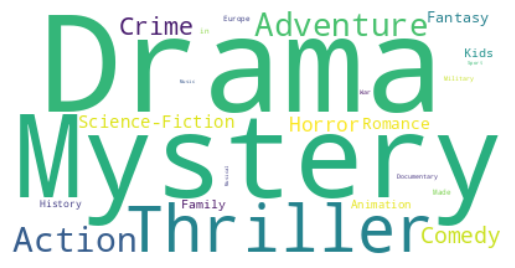

In [140]:
#Let's Visualize it using word cloud
# Visualizing genres for movie_df

# Storing DataFram into dict zip as this value is sorted in descending order (heigher genres to lower)
freq_dict_movies = dict(zip(top_movie_genres_df['Genre'], top_movie_genres_df['Count']))

wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq_dict_movies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


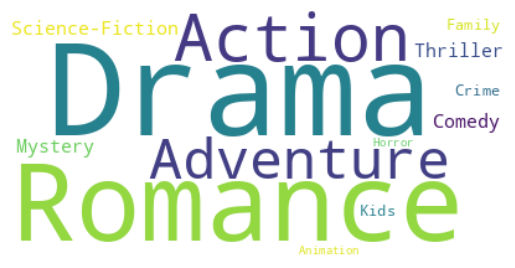

In [143]:
# Visualizing genres for tv_shows_df

# Storing DataFram into dict zip as this value is sorted in descending order (heigher genres to lower)
freq_dict_tvshows = dict(zip(top_tvshows_genres_df['Genre'], top_tvshows_genres_df['Count']))

wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq_dict_tvshows)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [176]:
# Defining a function to get predominant streaming service

def get_predominant_streaming_service(value):
  d = {}
  list_of_service = []
  for i in value:
    if i!=None:
      # print(i)
      i = i.replace(",", "")
      list_of_service.extend(i.split(" "))

  for i in list_of_service:
    if i not in d.keys():
      d[i] = list_of_service.count(i)

  return d


In [180]:
# Storing predominant streaming service in a variable called movies_predominant_streaming_service
movies_predominant_streaming_service = get_predominant_streaming_service(movies_df["Streaming Service"])

# Storing predominant streaming service in a variable called tvshows_predominant_streaming_service
tvshows_predominant_streaming_service = get_predominant_streaming_service(tv_shows_df["Streaming Service"])

# Creating a DataFrame for top predominant steaming service for movies
df_movies_predominant_streaming_service = pd.DataFrame(list(movies_predominant_streaming_service.items()), columns=['Streaming Service', 'Count']).sort_values(by='Count', ascending=False)

# Creating a DataFrame for top predominant steaming service for TV-Shows
df_tvshows_predominant_streaming_service = pd.DataFrame(list(tvshows_predominant_streaming_service.items()), columns=['Streaming Service', 'Count']).sort_values(by='Count', ascending=False)


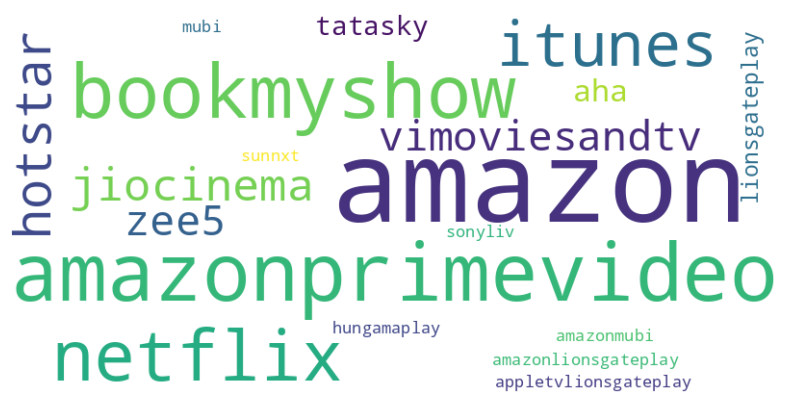

In [185]:
#Let's Visvalize it using word cloud
# Visualizing predominant streaming service for movies :

freq_ps_service_dict = dict(zip(df_movies_predominant_streaming_service['Streaming Service'], df_movies_predominant_streaming_service['Count']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_ps_service_dict )

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

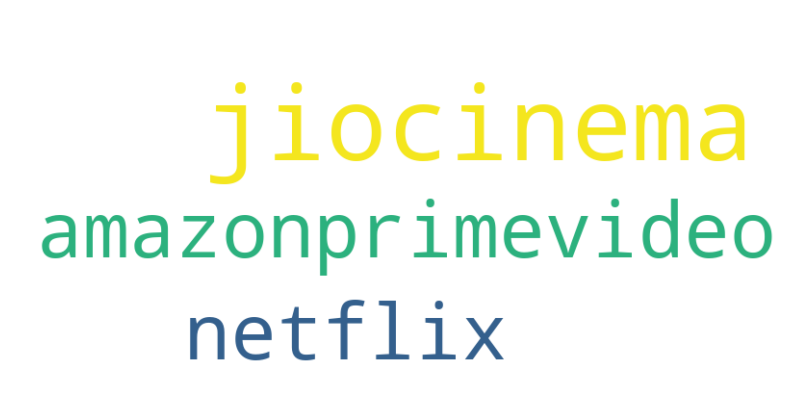

In [186]:
# Visualizing predominant streaming service for tv shows :

freq_ps_service_dict = dict(zip(df_tvshows_predominant_streaming_service['Streaming Service'], df_tvshows_predominant_streaming_service['Count']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_ps_service_dict )

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [169]:
# Saving final dataframe as Final Data in csv format
movies_df.to_csv("Movies Final Data.csv", index=False)
tv_shows_df.to_csv("TV-Shows Final Data.csv", index=False)

In [189]:
#saving filter data as Filter Data in csv format

# Saving Mean IMDB Ratings for both Movies and Tv Shows
mean_df.to_csv("Mean IMDB Ratings for both Movies and Tv Shows.csv", index=False)

# Saving top genres for movies
top_movie_genres_df.to_csv("Top Genres for Movies.csv", index=False)
top_tvshows_genres_df.to_csv("Top Genres for TV-Shows.csv", index=False)

# Saving Predominant Streaming Service
df_movies_predominant_streaming_service.to_csv("Predominant Streaming Service for Movies.csv", index=False)
df_tvshows_predominant_streaming_service.to_csv("Predominant Streaming Service for TV-Shows.csv", index=False)

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***